In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

#Loading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/travel insurance.csv")

# Display info
print(df.shape)
df.head(10)

(63326, 11)


,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,F,44
6,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,NaN,32
7,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,NaN,29
8,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,NaN,44
9,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99.0,59.40,NaN,37


# **Exploratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


# Categorical Data Analysis

In [ ]:
#Selecting categoricalfeatures
categorical_data=df.select_dtypes(include= 'object')

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 7 categorical features: 

['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Claim', 'Destination', 'Gender']


In [ ]:
# unique values counts
unique_counts=categorical_data.nunique()
print(unique_counts)

Agency                   16
Agency Type               2
Distribution Channel      2
Product Name             26
Claim                     2
Destination             149
Gender                    2
dtype: int64


Checking the distribution of Data

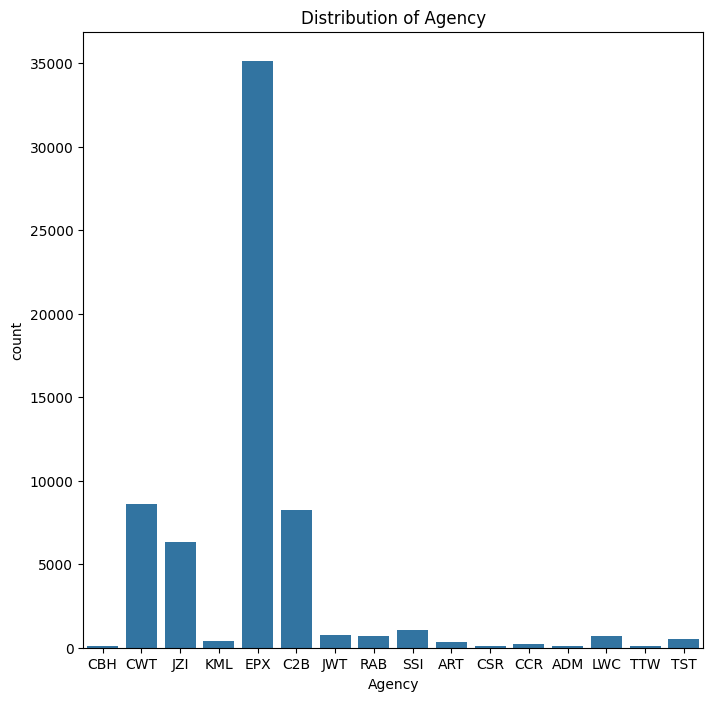

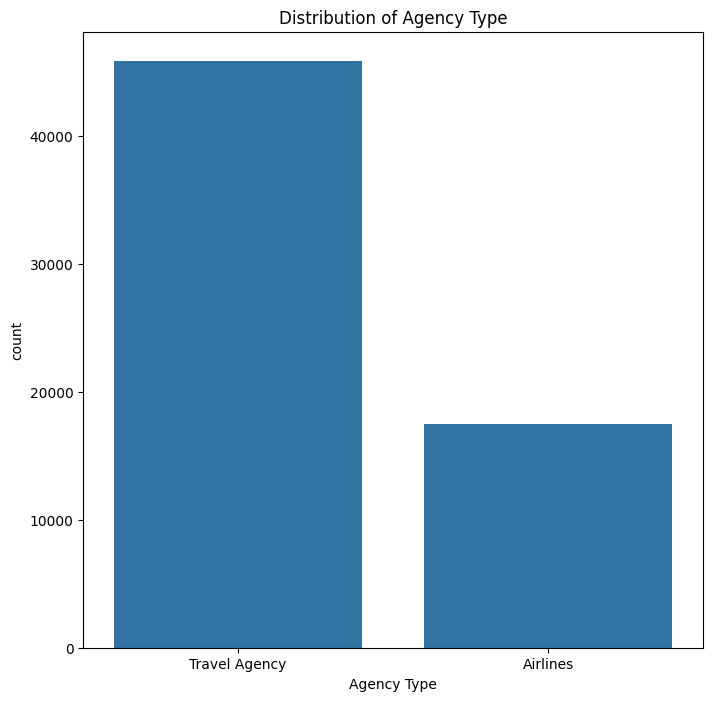

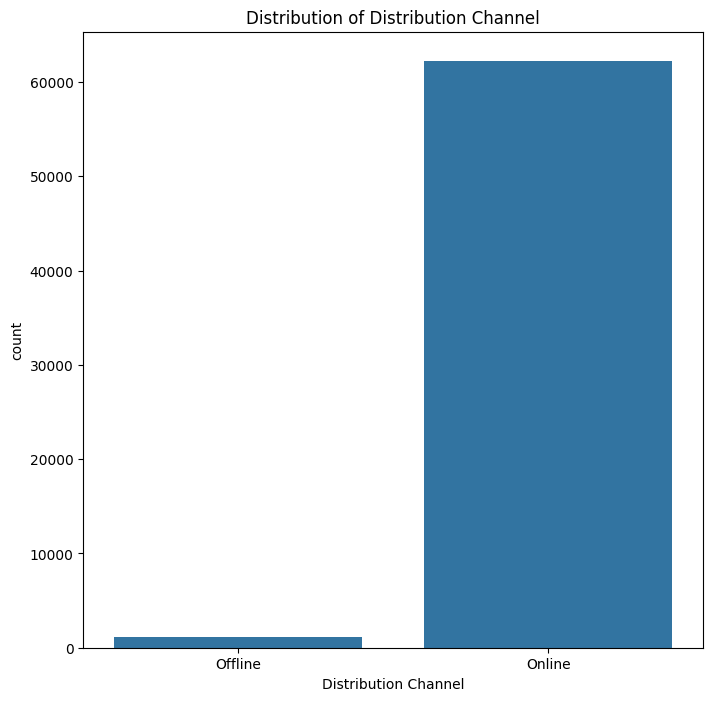

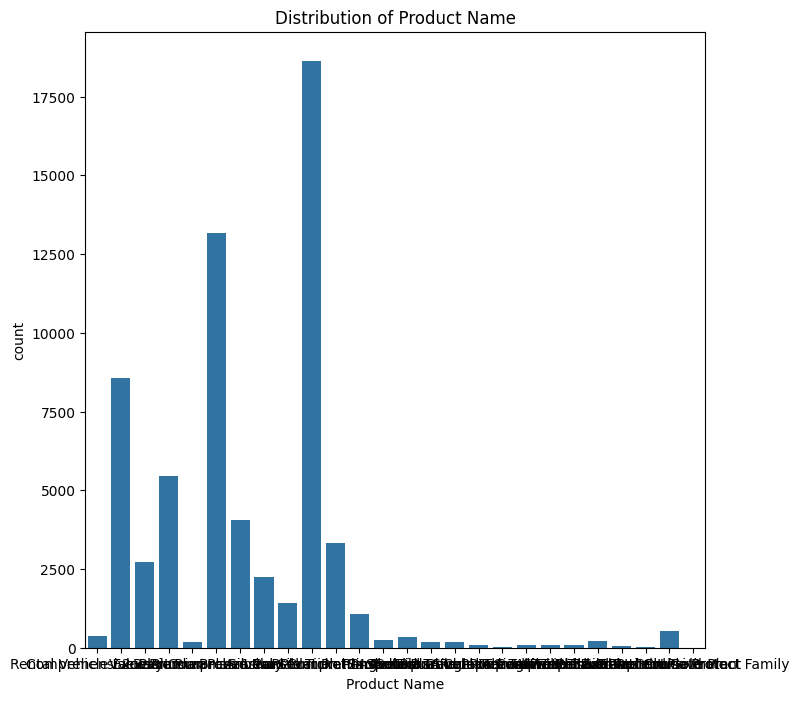

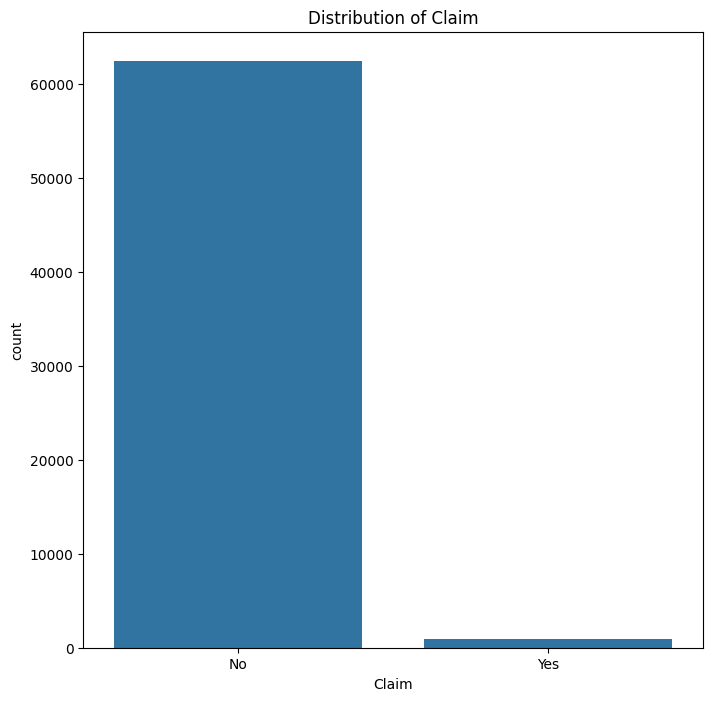

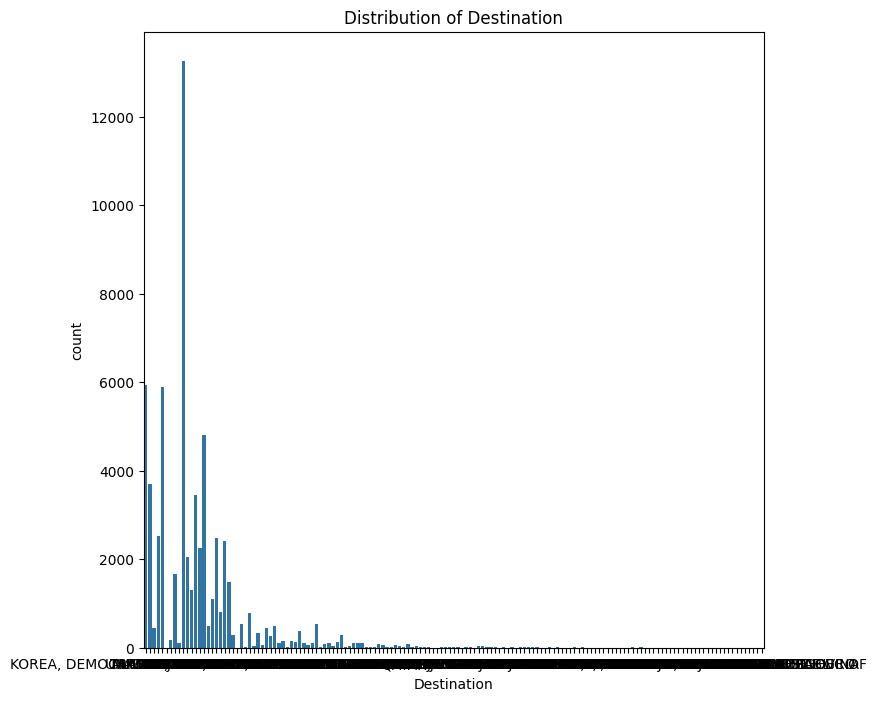

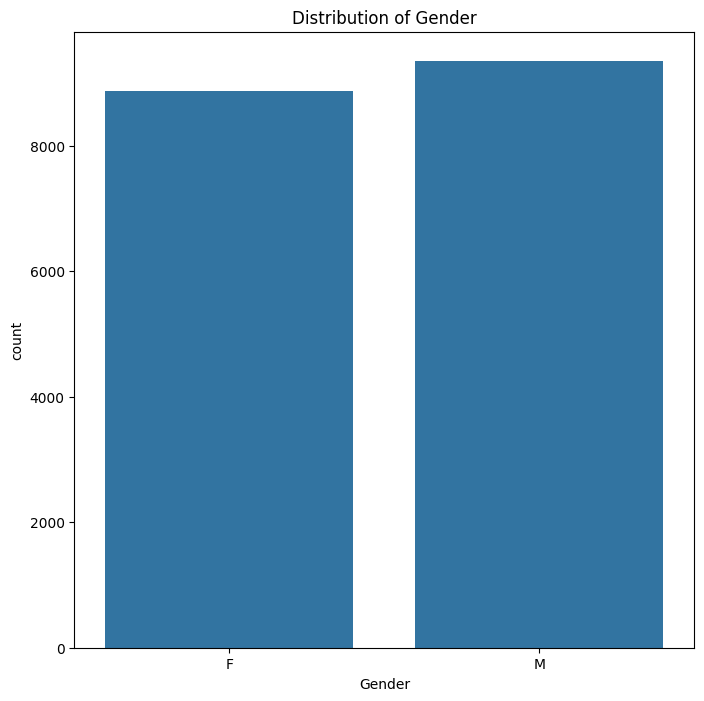

In [ ]:
for col in categorical_features:
  plt.figure(figsize=(8,8))
  plt.title(f'Distribution of {col}')
  sns.countplot(x=df[col])
  plt.show()

Checking the correlation Heatmap

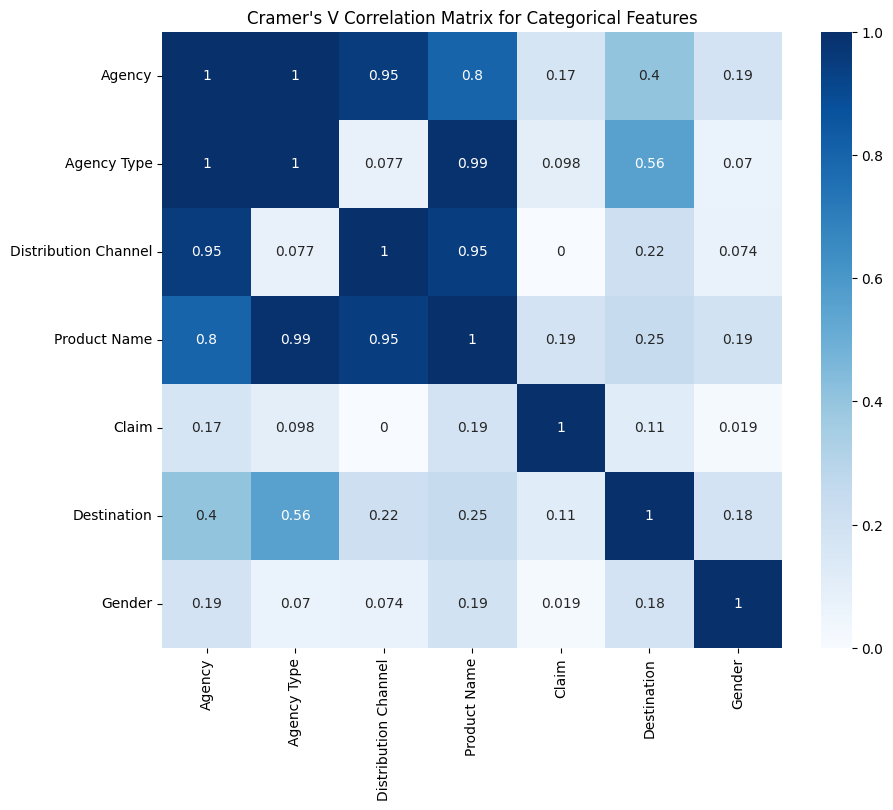

In [ ]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramer's V matrix
cramers_v_matrix = pd.DataFrame(
    [[cramers_v(df[col1], df[col2]) for col1 in categorical_features] for col2 in categorical_features],
    columns=categorical_features, index=categorical_features
)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='Blues')
plt.title('Cramer\'s V Correlation Matrix for Categorical Features')
plt.show()

# Numerical Data Analysis

In [ ]:
##Selecting numerical features
numerical_data = df.select_dtypes(include='number')

#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 4 numerical features: 

['Duration', 'Net Sales', 'Commision (in value)', 'Age']


Plotting Histograms

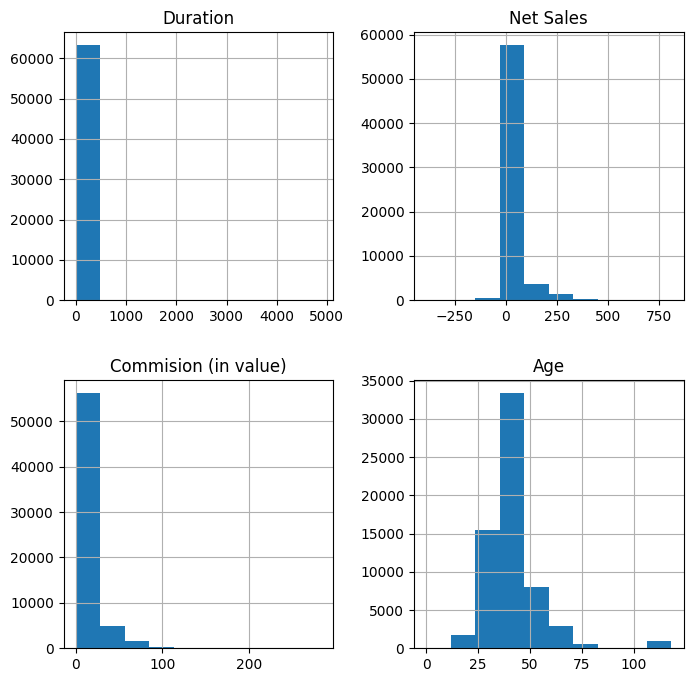

In [ ]:
numerical_data.hist(figsize=(8,8))
plt.show()

#boxplots

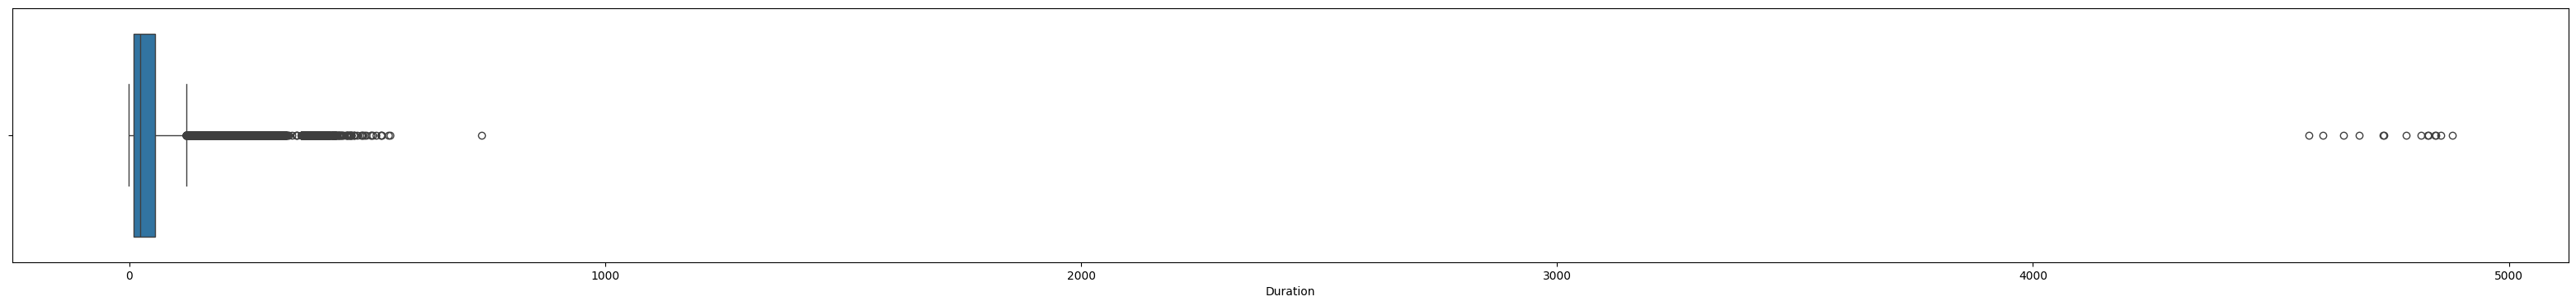

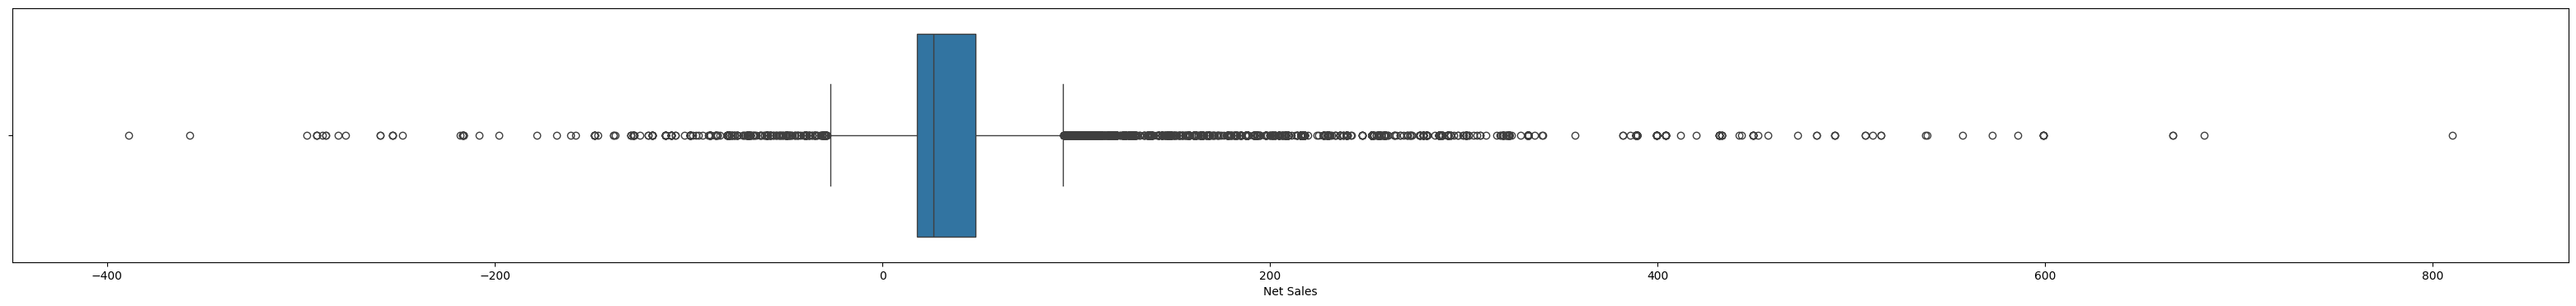

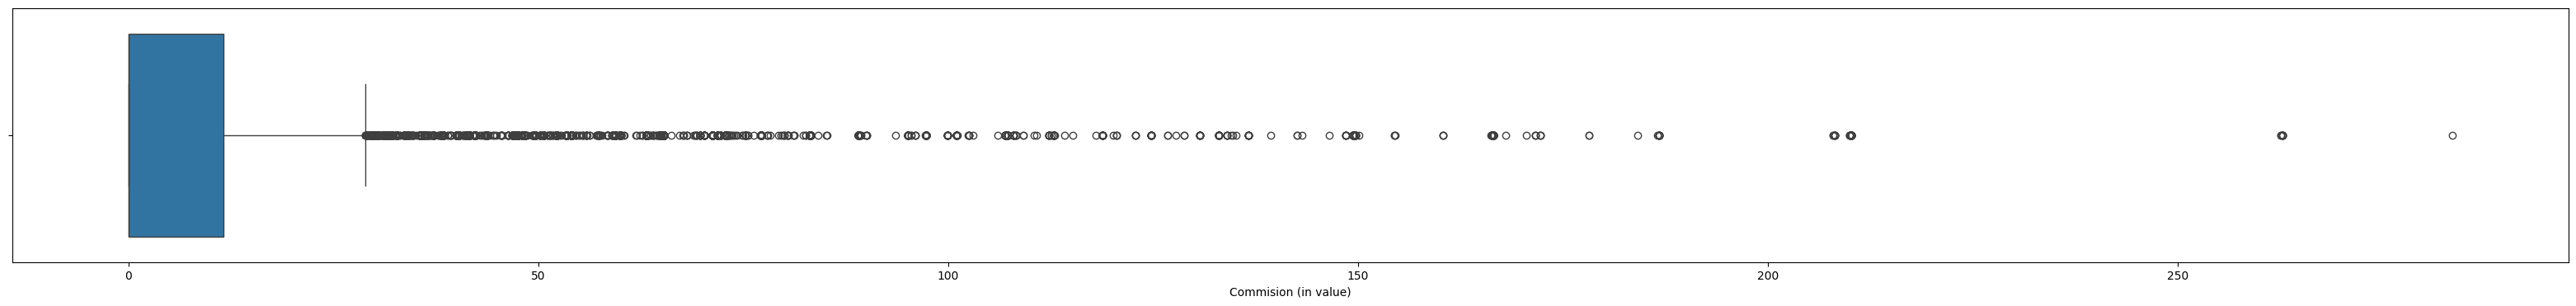

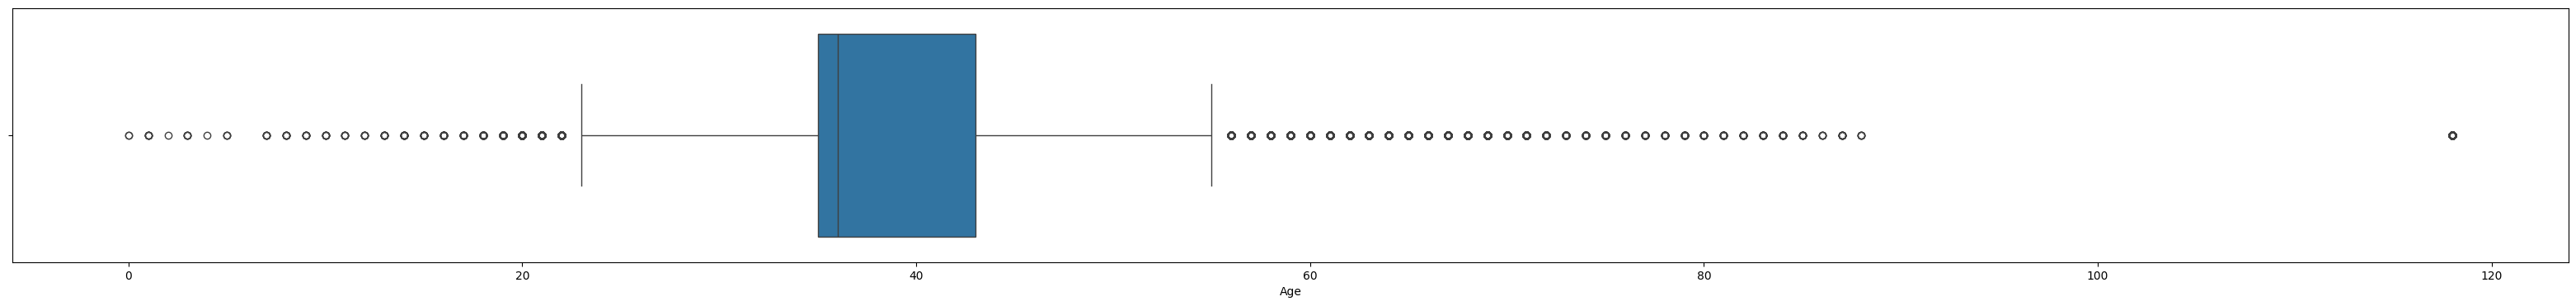

In [ ]:
for i in numerical_features:
  plt.figure(figsize=(40,4))
  sns.boxplot(x=df[i])
  plt.show()

#Numerical_Features Heatmap


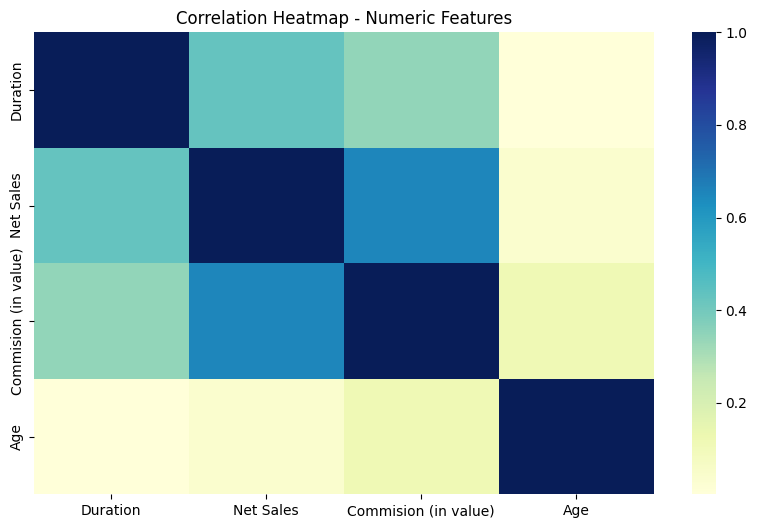

In [ ]:
# Select numeric columns
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# --- Heatmap vs Agency Type ---
corr_agency = df[num_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_agency, cmap = 'YlGnBu')
plt.title("Correlation Heatmap - Numeric Features")
plt.show()

In [ ]:
numerical_data.var()

,0
Duration,10361.522945
Net Sales,2385.896283
Commision (in value),392.213804
Age,196.476556


## Combined Heatmap


In [ ]:
from sklearn.preprocessing import OneHotEncoder

##Selecting numerical features
numerical_data = df.select_dtypes(include='number')

#append the features of numerical_data to list
numeric_features=numerical_data.columns.tolist()

categorical_data=df.select_dtypes(include= 'object')

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()


# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_categorical_data = pd.DataFrame(encoder.fit_transform(categorical_data), columns=encoder.get_feature_names_out(categorical_features))

# Combine numerical and encoded categorical data
combined_df = pd.concat([numerical_data, encoded_categorical_data], axis=1)

# Heatmap of numerical and encoded categorical features
plt.figure(figsize=(200, 150))
sns.heatmap(combined_df.corr(), cmap = 'YlGnBu')
plt.title('Correlation Heatmap - Numerical and Encoded Categorical Features')
plt.show()

#Handling Null_Values

In [ ]:
df.isnull().sum() #counting the number of null values in the dataframe

,0
Agency Type,0
Distribution Channel,0
Claim,0
Duration,0
Destination,0
Net Sales,0
Commision (in value),0
Gender,45107
Age,0


#Dropping Majority Null value column

In [ ]:
df = df.drop(columns=["Gender"])

#Feature Engineering

Dropping columns based on correlations

In [ ]:
drop_cols = ["Agency", "Product Name"]
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

#Categorical Encoding

In [ ]:
# Define target and features
y = df["Agency Type"].map({"Airlines":0, "Travel Agency":1})  # Binary target
X = df.drop(columns=["Agency Type"])

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numerical_features = X.select_dtypes(include=["int64","float64"]).columns.tolist()

print("Categorical:", categorical_features)
print("Numerical:", numerical_features)

# Preprocessing pipeline
preprocess = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

X_processed = preprocess.fit_transform(X).toarray()

print("Processed feature shape:", X_processed.shape)


Categorical: ['Distribution Channel', 'Claim', 'Destination']
Numerical: ['Duration', 'Net Sales', 'Commision (in value)', 'Age']
Processed feature shape: (63326, 157)


#Data Splitting

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (44328, 157)
Test shape: (18998, 157)


#KNN

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define candidate K values (odd only, to avoid ties)
k_values = [3, 5, 7, 9, 11]

results = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights="uniform", metric="euclidean")
    scores = cross_val_score(knn, X_processed, y, cv=5, scoring="accuracy", n_jobs=-1)
    results[k] = scores.mean()
    print(f"K={k} → CV Accuracy: {scores.mean():.4f}")

# Find best K
best_k = max(results, key=results.get)
print("\nBest K:", best_k, "with CV Accuracy:", results[best_k])


K=3 → CV Accuracy: 0.9858
K=5 → CV Accuracy: 0.9839
K=7 → CV Accuracy: 0.9817
K=9 → CV Accuracy: 0.9802
K=11 → CV Accuracy: 0.9791

Best K: 3 with CV Accuracy: 0.9857878754272749


Accuracy: 0.9866875118438506

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      5794
           1       0.99      0.99      0.99     15314

    accuracy                           0.99     21108
   macro avg       0.98      0.98      0.98     21108
weighted avg       0.99      0.99      0.99     21108



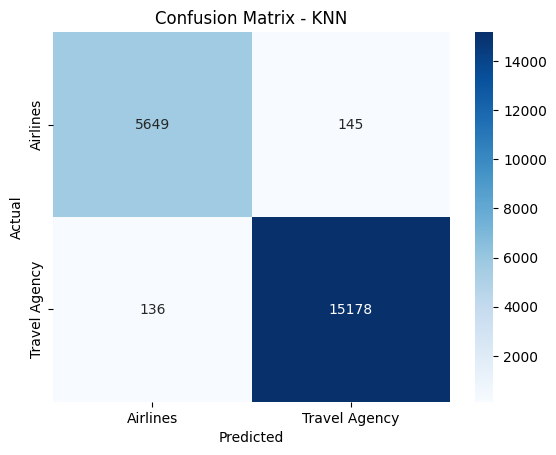

In [ ]:
# Train KNN
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Predict
y_pred_KNN = knn.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_KNN))
print("\nClassification Report:\n", classification_report(y_test, y_pred_KNN))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_KNN)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Airlines","Travel Agency"],
            yticklabels=["Airlines","Travel Agency"])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#

#Logistic Regression

In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# Logistic Regression from scratch
class LogisticRegressionGD:
    def __init__(self, lr=0.001, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        m, n = X.shape
        self.W = np.zeros(n)
        self.b = 0
        self.losses = []

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.W) + self.b
            y_pred_LR = sigmoid(linear_model)

            # Compute gradients
            dw = (1/m) * np.dot(X.T, (y_pred_LR - y))
            db = (1/m) * np.sum(y_pred_LR - y)

            # Update weights
            self.W -= self.lr * dw
            self.b -= self.lr * db

            # Compute loss
            loss = -(1/m) * np.sum(y*np.log(y_pred_LR+1e-10) + (1-y)*np.log(1-y_pred_LR+1e-10))
            self.losses.append(loss)

    def predict(self, X):
        linear_model = np.dot(X, self.W) + self.b
        y_pred_LR = sigmoid(linear_model)
        return np.where(y_pred_LR >= 0.5, 1, 0)

# Train model
model_Logistic = LogisticRegressionGD(lr=0.1, epochs=1000)
model_Logistic.fit(X_train, y_train)
# Predictions
y_pred_LR = model_Logistic.predict(X_test)

# Accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred_LR))

print("Logistic Regression:")
print(classification_report(y_test, y_pred_LR))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_LR)
print("\nConfusion Matrix:\n", cm)

Test Accuracy: 0.817557324237256
Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.58      0.64      5794
           1       0.85      0.91      0.88     15314

    accuracy                           0.82     21108
   macro avg       0.78      0.74      0.76     21108
weighted avg       0.81      0.82      0.81     21108


Confusion Matrix:
 [[ 3360  2434]
 [ 1417 13897]]


#Neural Network

In [ ]:
model_NN = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation="sigmoid") # Output layer for binary classification
])

# Compile with Gradient Descent optimizer (SGD)
model_NN.compile(optimizer=SGD(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_NN.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                │ (None, 512)            │        80,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 463,041 (1.77 MB)

 Trainable params: 463,041 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.7255 - loss: 0.6616 - val_accuracy: 0.7255 - val_loss: 0.6074
Epoch 2/20
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7244 - loss: 0.6015 - val_accuracy: 0.7255 - val_loss: 0.5896
Epoch 3/20
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.7275 - loss: 0.5865 - val_accuracy: 0.7255 - val_loss: 0.5854
Epoch 4/20
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7233 - loss: 0.5866 - val_accuracy: 0.7255 - val_loss: 0.5826
Epoch 5/20
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.7257 - loss: 0.5813 - val_accuracy: 0.7255 - val_loss: 0.5785
Epoch 6/20
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7247 - loss: 0.5771 - val_accuracy: 0.7255 - val_loss: 0.5670
Epoch 7/20
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.7264 - loss: 0.5611 - val_accuracy: 0.7255 - val_loss: 0.5414
Epoch 8/20
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7220 -

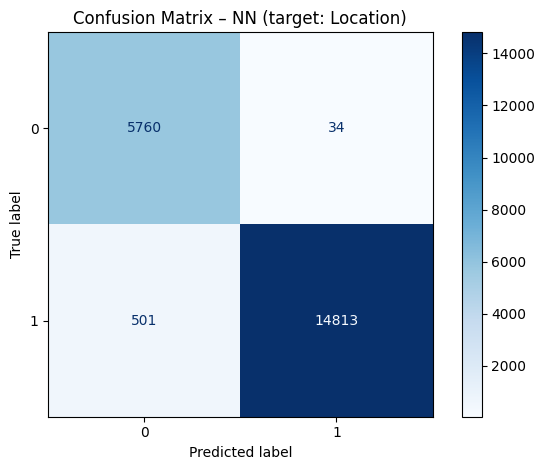

In [ ]:

# Train model_NN
history = model_NN.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=1)

test_acc = model_NN.evaluate(X_test, y_test, verbose=0)[1]
print(f"\nTest Accuracy: {test_acc*100:.2f}%")
y_pred_NN = (model_NN.predict(X_test, verbose=0).ravel() >= 0.5).astype(int)
print("\nClassification Report:\n", classification_report(y_test, y_pred_NN))

cm = confusion_matrix(y_test, y_pred_NN)
ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot(cmap="Blues")
plt.title("Confusion Matrix – NN (target: Location)")
plt.tight_layout(); plt.show()

Test Accuracy: 99.35%
Test Loss: 0.0254


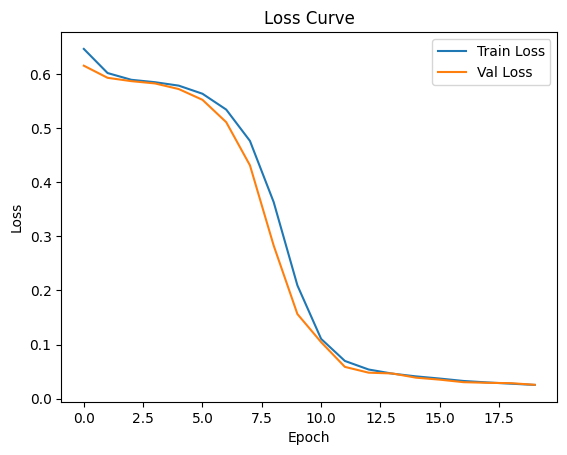

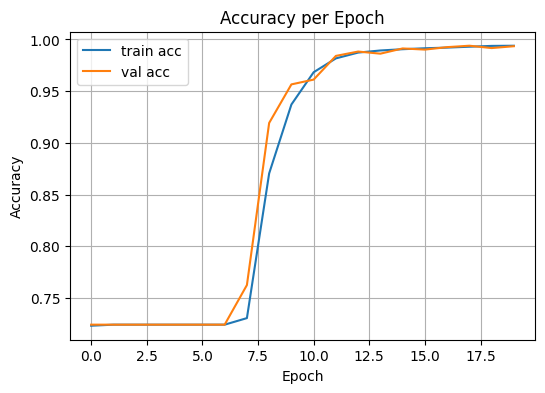

In [ ]:

# Evaluate on test data
loss, accuracy = model_NN.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")

# Plot loss curve
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()

# 2) (Optional) accuracy curve (key name varies by TF version)
train_acc_key = 'accuracy' if 'accuracy' in history.history else 'acc'
val_acc_key   = 'val_accuracy' if 'val_accuracy' in history.history else 'val_acc'
if train_acc_key in history.history:
    plt.figure(figsize=(6,4))
    plt.plot(history.history[train_acc_key], label='train acc')
    if val_acc_key in history.history:
        plt.plot(history.history[val_acc_key], label='val acc')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

#Precision, Recall, Accuracy

,Accuracy,Precision,Recall
KNN,0.986688,0.986682,0.986688
Logistic Regression,0.817557,0.810446,0.817557
Neural Network,0.974654,0.976374,0.974654


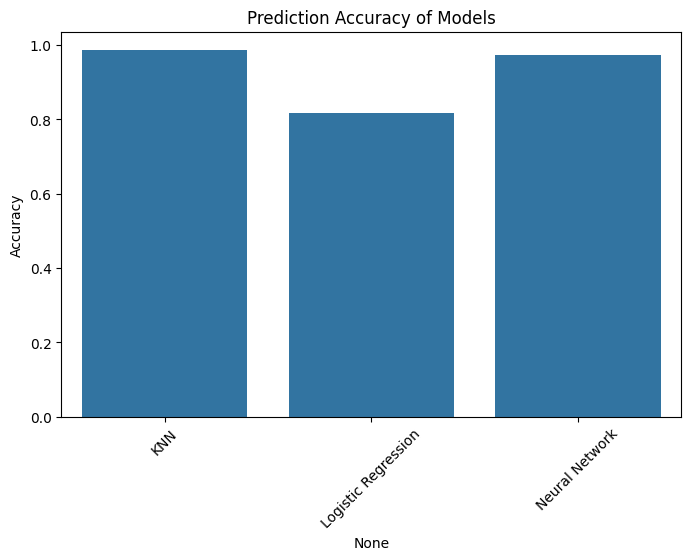

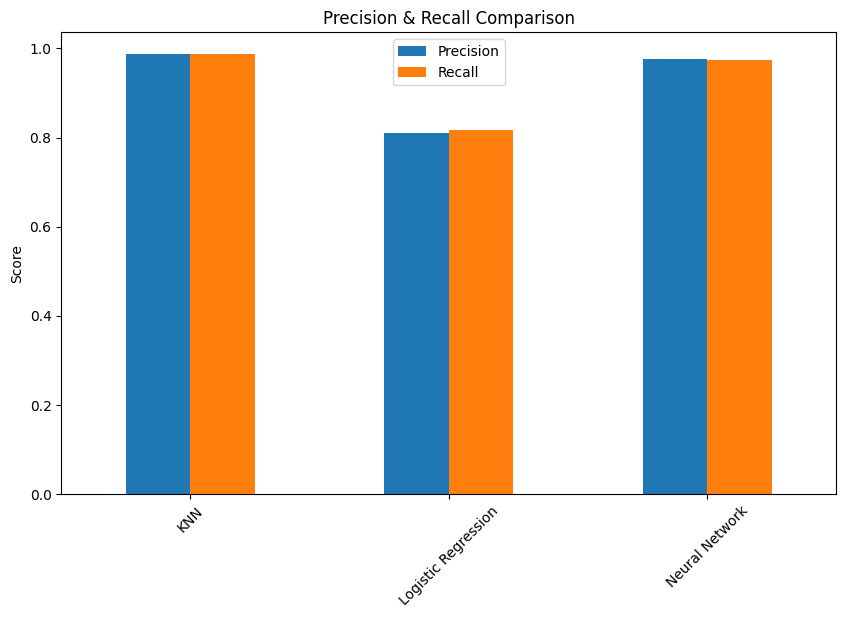

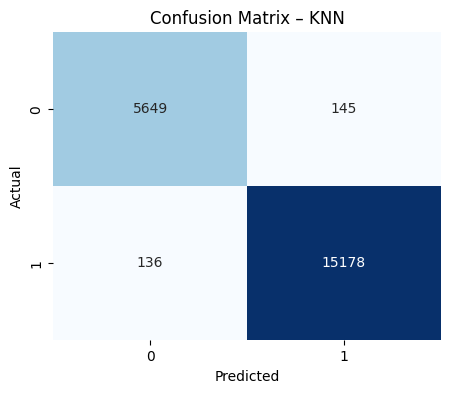

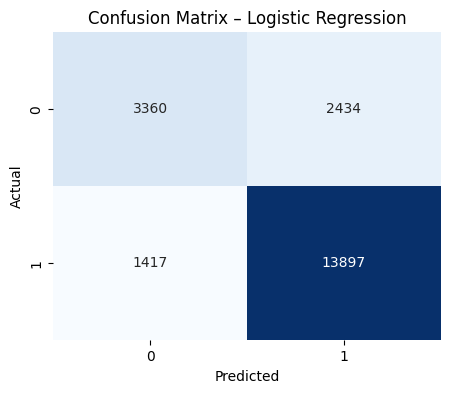

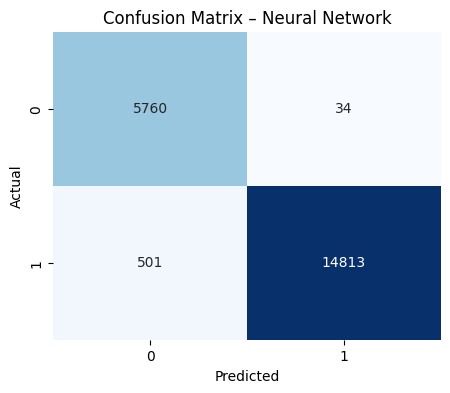

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Collect predictions into a dict
models_preds = {
    "KNN": y_pred_KNN,
    "Logistic Regression": y_pred_LR,
    "Neural Network": y_pred_NN
}

# Evaluate metrics
results = {}
for name, y_pred in models_preds.items():
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted")
    }

# Convert to DataFrame
metrics_df = pd.DataFrame(results).T
display(metrics_df)

# === 1. Bar chart - Accuracy ===
plt.figure(figsize=(8,5))
sns.barplot(x=metrics_df.index, y=metrics_df["Accuracy"])
plt.title("Prediction Accuracy of Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

# === 2. Precision & Recall Comparison ===
metrics_df[["Precision", "Recall"]].plot(kind="bar", figsize=(10,6))
plt.title("Precision & Recall Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

# === 3. Confusion Matrices for all models ===
for name, y_pred in models_preds.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix – {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


#K fold for Neural Network

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# -------------------------------
# Define NN model
# -------------------------------
def build_nn(input_dim):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_dim,)),
        Dense(512, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation="sigmoid")  # Output for binary classification
    ])

    # Compile with SGD optimizer
    model.compile(optimizer=SGD(learning_rate=0.001),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

# -------------------------------
# Stratified K-Fold CV
# -------------------------------
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
accs = []

X_array = np.array(X_processed)
y_array = np.array(y)

for fold, (train_idx, test_idx) in enumerate(cv.split(X_array, y_array), 1):
    X_train, X_test = X_array[train_idx], X_array[test_idx]
    y_train, y_test = y_array[train_idx], y_array[test_idx]

    model = build_nn(X_train.shape[1])
    model.fit(X_train, y_train, epochs=20, verbose=1)

    y_pred = (model.predict(X_test) >= 0.5).astype(int).ravel()
    acc = accuracy_score(y_test, y_pred)
    accs.append(acc)
    print(f"Fold {fold} accuracy: {acc:.4f}")

print(f"\nMean CV Accuracy: {np.mean(accs):.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7229 - loss: 0.6661
Epoch 2/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.7228 - loss: 0.6076
Epoch 3/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7262 - loss: 0.5884
Epoch 4/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.7242 - loss: 0.5838
Epoch 5/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.7247 - loss: 0.5772
Epoch 6/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7279 - loss: 0.5651
Epoch 7/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7257 - loss: 0.5518
Epoch 8/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7243 - loss: 0.5219
Epoch 9/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7355 - loss: 0.4507
Epoch 10/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8963 - loss: 0.3316
Epoch 11/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9358 - loss: 0.1895
Epoch 12/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7191 - loss: 0.6607
Epoch 2/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7279 - loss: 0.5974
Epoch 3/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7218 - loss: 0.5910
Epoch 4/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7280 - loss: 0.5820
Epoch 5/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7277 - loss: 0.5790
Epoch 6/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7234 - loss: 0.5747
Epoch 7/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7249 - loss: 0.5539
Epoch 8/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7214 - loss: 0.5187
Epoch 9/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7330 - loss: 0.4581
Epoch 10/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8890 - loss: 0.3532
Epoch 11/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9419 - loss: 0.1994
Epoch 12/20
15

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1584/1584 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7252 - loss: 0.6482
Epoch 2/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7237 - loss: 0.5898
Epoch 3/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7269 - loss: 0.5799
Epoch 4/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7269 - loss: 0.5728
Epoch 5/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.7228 - loss: 0.5610
Epoch 6/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7221 - loss: 0.5243
Epoch 7/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7236 - loss: 0.4505
Epoch 8/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8966 - loss: 0.3213
Epoch 9/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9586 - loss: 0.2114
Epoch 10/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9795 - loss: 0.1443
Epoch 11/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9846 - loss: 0.1000
Epoch 12/20
1584/1584 ━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1584/1584 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7199 - loss: 0.6455
Epoch 2/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7199 - loss: 0.5910
Epoch 3/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7246 - loss: 0.5762
Epoch 4/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7266 - loss: 0.5539
Epoch 5/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7233 - loss: 0.5052
Epoch 6/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7773 - loss: 0.4070
Epoch 7/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.9189 - loss: 0.2661
Epoch 8/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9586 - loss: 0.1432
Epoch 9/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9772 - loss: 0.0812
Epoch 10/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9859 - loss: 0.0567
Epoch 11/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9888 - loss: 0.0454
Epoch 12/20
1584/1584 ━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7235 - loss: 0.6455
Epoch 2/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7236 - loss: 0.5853
Epoch 3/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7231 - loss: 0.5688
Epoch 4/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7263 - loss: 0.5202
Epoch 5/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7280 - loss: 0.4345
Epoch 6/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8958 - loss: 0.3260
Epoch 7/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9417 - loss: 0.2114
Epoch 8/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9678 - loss: 0.1205
Epoch 9/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9798 - loss: 0.0736
Epoch 10/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9856 - loss: 0.0555
Epoch 11/20
1584/1584 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9881 - loss: 0.0447
Epoch 12/20
1584/15

#K-Fold for KNN

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define candidate K values (odd only, to avoid ties)
k_values = [3, 5, 7, 9, 11]

results = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights="uniform", metric="euclidean")
    scores = cross_val_score(knn, X_processed, y, cv=5, scoring="accuracy", n_jobs=-1)
    results[k] = scores.mean()
    print(f"K={k} → CV Accuracy: {scores.mean():.4f}")

# Find best K
best_k = max(results, key=results.get)
print("\nBest K:", best_k, "with CV Accuracy:", results[best_k])
# Use already processed dense features
X_array = np.array(X_processed)
y_array = np.array(y)

# Define KNN model
knn = KNeighborsClassifier(n_neighbors=best_k)

# Stratified K-Fold CV
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Cross-validation scores
scores = cross_val_score(knn, X_array, y_array, cv=cv, scoring="accuracy")

print("KNN accuracy per fold:", scores)
print("Mean accuracy:", scores.mean())


KNN accuracy per fold: [0.98370363 0.98313516 0.98389236]
Mean accuracy: 0.9835770507423861


#K-Fold for Logistic Regression

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Convert to NumPy arrays
X_array = np.array(X_processed)
y_array = np.array(y)

kf = KFold(n_splits=3, shuffle=True, random_state=42)

accuracies, precisions, recalls, f1s, conf_matrices = [], [], [], [], []
fold = 1

for train_index, test_index in kf.split(X_array):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]

    # fresh model each fold
    model = LogisticRegressionGD()
    model.fit(X_train, y_train)

    # predictions
    y_pred = model.predict(X_test)

    # metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # save results
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    conf_matrices.append(confusion_matrix(y_test, y_pred))

    print(f"Fold {fold} → Acc={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}")
    fold += 1

print(f"Mean Accuracy : {np.mean(accuracies):.4f}")



Fold 1 → Acc=0.7465, Prec=0.7445, Rec=0.9901, F1=0.8499
Fold 2 → Acc=0.7440, Prec=0.7421, Rec=0.9898, F1=0.8482
Fold 3 → Acc=0.7469, Prec=0.7449, Rec=0.9902, F1=0.8502
Mean Accuracy : 0.7458


#AUC,ROC

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7145 - loss: 0.6718
Epoch 2/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7247 - loss: 0.6180
Epoch 3/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7203 - loss: 0.5993
Epoch 4/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.7231 - loss: 0.5896
Epoch 5/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7216 - loss: 0.5876
Epoch 6/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7245 - loss: 0.5813
Epoch 7/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7244 - loss: 0.5757
Epoch 8/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7269 - loss: 0.5620
Epoch 9/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.7258 - loss: 0.5407
Epoch 10/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7274 - loss: 0.4984
660/660 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


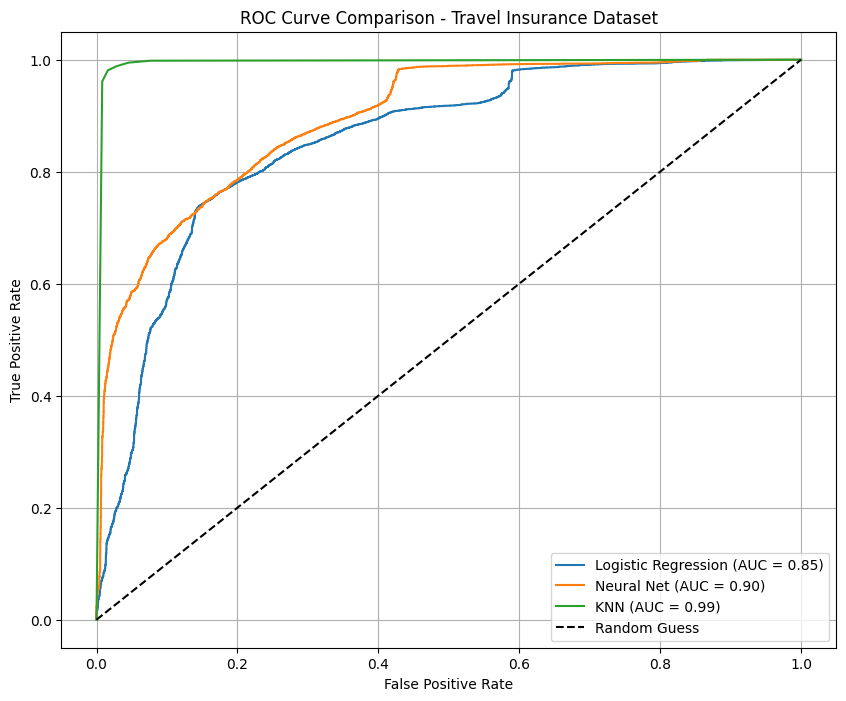

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

plt.figure(figsize=(10, 8))

# --- Logistic Regression (from scratch GD) ---
log_reg = LogisticRegressionGD(lr=0.1, epochs=1000)
log_reg.fit(X_train, y_train)

# manually compute probabilities using sigmoid
linear_model = np.dot(X_test, log_reg.W) + log_reg.b
y_probs_logreg = 1 / (1 + np.exp(-linear_model))

fpr, tpr, _ = roc_curve(y_test, y_probs_logreg)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")

# --- Neural Network (Keras model) ---
nn_model = build_nn(X_train.shape[1])
nn_model.fit(X_train, y_train, epochs=10)
y_probs_nn = nn_model.predict(X_test).ravel()

fpr, tpr, _ = roc_curve(y_test, y_probs_nn)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Neural Net (AUC = {roc_auc:.2f})")

# --- KNN ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_probs_knn = knn.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_probs_knn)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"KNN (AUC = {roc_auc:.2f})")

# --- Plot random baseline ---
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# --- Finalize plot ---
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Travel Insurance Dataset")
plt.legend(loc="lower right")
plt.grid()
plt.show()


#K-mean clustering

Optimal K (Elbow Point) = 5


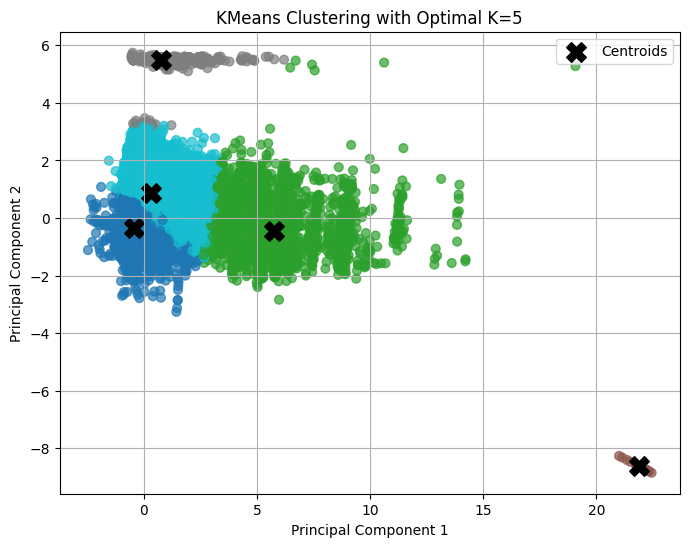

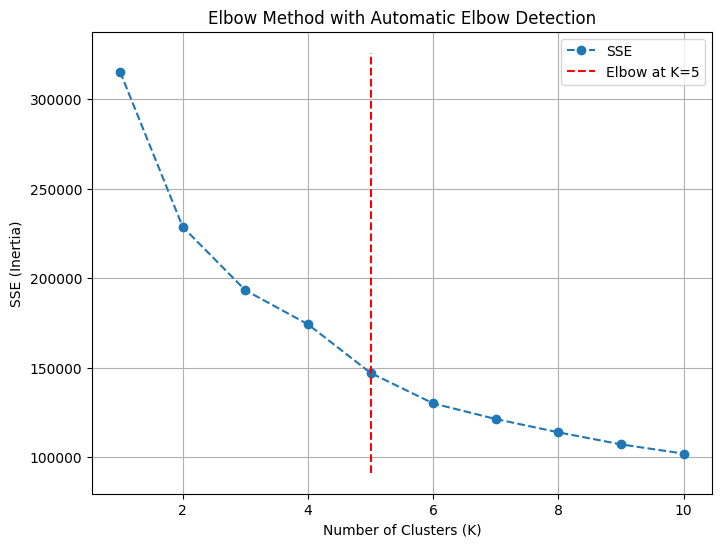

In [ ]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.decomposition import PCA

# --- Step 1: Range of K values ---
K_range = range(1, 11)
sse = []

# --- Step 2: Compute SSE (Inertia) for each K ---
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_processed)
    sse.append(km.inertia_)

# --- Step 3: Find elbow automatically ---
kl = KneeLocator(K_range, sse, curve="convex", direction="decreasing")
best_k = kl.knee
print(f"Optimal K (Elbow Point) = {best_k}")

# --- Step 4: Fit KMeans with optimal K ---
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_processed)

# --- Step 5: PCA for 2D visualization ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)
centers_pca = pca.transform(kmeans.cluster_centers_)

# --- Step 6: Plot clusters with centroids ---
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="tab10", s=40, alpha=0.7)
plt.scatter(centers_pca[:,0], centers_pca[:,1], c="black", marker="X", s=200, label="Centroids")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"KMeans Clustering with Optimal K={best_k}")
plt.legend()
plt.grid(True)
plt.show()

# --- Step 7: Plot Elbow Curve ---
plt.figure(figsize=(8,6))
plt.plot(K_range, sse, marker="o", linestyle="--", label="SSE")
plt.vlines(best_k, plt.ylim()[0], plt.ylim()[1], linestyles="dashed", colors="red", label=f"Elbow at K={best_k}")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method with Automatic Elbow Detection")
plt.legend()
plt.grid(True)
plt.show()
